<a href="https://colab.research.google.com/github/yaniv256/VAEs-in-Economics/blob/master/Notebooks/Covid_19_VAEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 with VAEs

## Confirmed Covid-19 cases

### Data

#### Load it

In [1]:
!rm -f master.zip
!rm -rf COVID-19-master
!wget https://github.com/CSSEGISandData/COVID-19/archive/master.zip
!unzip master > null

--2020-03-27 10:05:40--  https://github.com/CSSEGISandData/COVID-19/archive/master.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/CSSEGISandData/COVID-19/zip/master [following]
--2020-03-27 10:05:40--  https://codeload.github.com/CSSEGISandData/COVID-19/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57787845 (55M) [application/zip]
Saving to: ‘master.zip’

master.zip          100%[===================>]  55.11M   146MB/s    in 0.4s    

2020-03-27 10:05:40 (146 MB/s) - ‘master.zip’ saved [57787845/57787845]



In [0]:
import re
import pandas as pd
from collections import OrderedDict

# ls gives the files sorted alphabetically which is the correct time order
files = !ls COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/*.csv
dates = [re.search('/([0-9\-]+)\.csv$', file).group(1) for file in files]

# keep the order
df_dict = OrderedDict((date, pd.read_csv(file_name)) 
                      for date, file_name in zip(dates,files))

#### Create time series

In [0]:
for date, df in df_dict.items():

  if 'Province/State' in df.columns:
    zip_all = zip(pd.isnull(df.loc[:,'Province/State']),
                  df.loc[:,'Country/Region'],
                  df.loc[:,'Province/State'])
    
    row_index = ['{}, {}'.format(province, country) if not missing 
                 else country for (missing,country,province) 
                 in zip_all]
  else:
    row_index = df.loc[:,'Combined_Key'].tolist()

  df_dict[date] = pd.DataFrame(df.values, index=row_index, columns=df.columns)

confirmed = pd.DataFrame(OrderedDict((date,df.Confirmed) for date,df in df_dict.items()))
confirmed.to_csv('covid19_confirmed.csv')

#### Aggregate counties into states

In [4]:
!pip install us

In [0]:
import us

state_dict = us.states.mapping('abbr', 'name')

In [0]:
import numpy as np

prog = re.compile('[a-zA-Z. ]+, *(\w{2}), *US')
location = np.array([state_dict[prog.search(index).group(1)] +', US'
                    if prog.search(index) != None 
                    else index
                    for index in confirmed.index])

prog = re.compile('[a-zA-Z. ]+, *([a-zA-Z. ]+), *US')
location = np.array([prog.search(index).group(1) +', US'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('^(?P<name>[a-zA-Z. ]+), *(?P=name)$')
location = np.array([prog.search(index).group('name')
                    if prog.search(index) != None 
                    else index
                    for index in location])


prog = re.compile('^(.*)Mainland China$')
location = np.array([prog.search(index).group(1) +'China'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('(Hong Kong)')
location = np.array(['Hong Kong, China'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('District of Columbia')
location = np.array(['District of Columbia, US'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('D\.C\.')
location = np.array(['District of Columbia, US'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Korea')
location = np.array(['South Korea'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Iran')
location = np.array(['Iran'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Macau')
location = np.array(['Macau'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Russian')
location = np.array(['Russia'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Diamond Princess')
location = np.array(['Diamond Princess'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Virgin Islands')
location = np.array(['Virgin Islands'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Czech Republic')
location = np.array(['Czechia'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Faroe Islands')
location = np.array(['Faroe Islands, Denmark'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Cayman Islands')
location = np.array(['Cayman Islands, United Kingdom'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Gibraltar')
location = np.array(['Gibraltar, United Kingdom'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Curacao')
location = np.array(['Curacao, Netherlands'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('French Guiana')
location = np.array(['French Guiana, France'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Fench Guiana, France')
location = np.array(['French Guiana, France'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Gambia')
location = np.array(['Gambia'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Grand Princess')
location = np.array(['Grand Princess'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Guadeloupe')
location = np.array(['Guadeloupe, France'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('OR , US')
location = np.array(['Oregon, US'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Martinique')
location = np.array(['Martinique, France'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Mayotte')
location = np.array(['Mayotte, France'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Martin')
location = np.array(['St Martin, France'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Reunion')
location = np.array(['Reunion, France'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Saint Barthelemy')
location = np.array(['Saint Barthelemy, France'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('ON, Canada')
location = np.array(['Ontario, Canada'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Taiwan')
location = np.array(['Taiwan'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('^UK')
location = np.array(['United Kingdom'
                    if prog.search(index) != None 
                    else index
                    for index in location])


prog = re.compile('Aruba')
location = np.array(['Aruba, Netherlands'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Bahamas')
location = np.array(['Bahamas'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Greenland')
location = np.array(['Greenland, Denmark'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Channel Islands')
location = np.array(['Channel Islands, United Kingdom'
                    if prog.search(index) != None 
                    else index
                    for index in location])

prog = re.compile('Viet Nam')
location = np.array(['Vietnam'
                    if prog.search(index) != None 
                    else index
                    for index in location])

#list(filter(lambda x: x != None,location.tolist()))

In [7]:
confirmed = pd.DataFrame({loc:confirmed.loc[location == loc].sum() for loc in location}).T
confirmed.shape

(335, 65)

#### Fix France March 23rd

In [8]:
confirmed.loc["France"].loc['03-23-2020'],confirmed.loc["French Polynesia, France"].loc['03-23-2020']

(0.0, 19874.0)

In [9]:
confirmed.loc["France"].loc['03-23-2020'] = confirmed.loc["French Polynesia, France"].loc['03-23-2020']
confirmed.loc["French Polynesia, France"].loc['03-23-2020']= \
((confirmed.loc["French Polynesia, France"].loc['03-22-2020']
 +confirmed.loc["French Polynesia, France"].loc['03-24-2020'])/2)

confirmed.loc["France"].loc['03-23-2020'],confirmed.loc["French Polynesia, France"].loc['03-23-2020']

(19874.0, 20.0)

In [0]:
confirmed.to_csv('covid19_confirmed.csv')

#### Create train-test split

In [11]:
from sklearn.model_selection import train_test_split 
x_train, x_test = train_test_split(confirmed, test_size=0.25, random_state=42)
confirmed = pd.concat([x_train,x_test], axis=0)

x_train.shape, x_test.shape

((251, 65), (84, 65))

#### Transform to percentiles

In [12]:
from sklearn.preprocessing import QuantileTransformer

qt_trans = QuantileTransformer(n_quantiles=101, random_state=2)
qt_trans.fit(x_train)
x_train = pd.DataFrame(qt_trans.transform(x_train), 
                       index=x_train.index, columns=x_train.columns)
x_test = pd.DataFrame(qt_trans.transform(x_test), 
                       index=x_test.index, columns=x_test.columns)
x_train

,01-22-2020,01-23-2020,01-24-2020,01-25-2020,01-26-2020,01-27-2020,01-28-2020,01-29-2020,01-30-2020,01-31-2020,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,02-13-2020,02-14-2020,02-15-2020,02-16-2020,02-17-2020,02-18-2020,02-19-2020,02-20-2020,02-21-2020,02-22-2020,02-23-2020,02-24-2020,02-25-2020,02-26-2020,02-27-2020,02-28-2020,02-29-2020,03-01-2020,03-02-2020,03-03-2020,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,03-13-2020,03-14-2020,03-15-2020,03-16-2020,03-17-2020,03-18-2020,03-19-2020,03-20-2020,03-21-2020,03-22-2020,03-23-2020,03-24-2020,03-25-2020,03-26-2020
"Zhejiang, China",0.986667,0.99006,0.990069,0.990036,0.990109,0.990,0.990007,0.990142,0.990244,0.990266,0.990181,0.990093,0.990061,0.990053,0.990035,0.990024,0.990019,0.990013,0.990007,0.990003,0.990002,0.989918,0.989514,0.989384,0.988945,0.988650,0.988408,0.988172,0.988103,0.988069,0.988704,0.988692,0.988675,0.988675,0.988675,0.987560,0.986427,0.986416,0.986393,0.986393,0.980000,0.980000,0.980000,0.980000,0.980000,0.980000,0.980,0.980000,0.968876,0.968858,0.968858,0.968717,0.964986,0.961047,0.958024,0.948839,0.948295,0.940000,0.940000,0.933759,0.927937,0.920000,0.912149,0.892400,0.875077
East Timor,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.175000,0.000000,0.000000,0.000000,0.000000,0.000000
Serbia,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.580000,0.555000,0.510,0.500000,0.610000,0.680000,0.710000,0.726667,0.720000,0.700000,0.690000,0.665000,0.675000,0.671111,0.685714,0.691765,0.700000,0.690909,0.695357,0.716250,0.690270
"California, US",0.000000,0.00000,0.000000,0.000000,0.873333,0.864,0.860000,0.860000,0.853333,0.855000,0.860000,0.860000,0.866667,0.865000,0.865000,0.865000,0.860000,0.860000,0.861818,0.860000,0.860000,0.860000,0.860000,0.860000,0.860000,0.860000,0.860000,0.860000,0.860000,0.860000,0.868889,0.860000,0.860000,0.860000,0.850000,0.846667,0.846000,0.844615,0.833333,0.823333,0.840000,0.836667,0.840000,0.841538,0.841053,0.856000,0.859,0.854348,0.871429,0.872000,0.880000,0.888409,0.897174,0.899767,0.909434,0.920000,0.919365,0.927324,0.937273,0.942786,0.944124,0.950447,0.953726,0.957045,0.960000
"Newfoundland and Labrador, Canada",0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,0.265000,0.340000,0.315000,0.300000,0.293333,0.300000,0.296000,0.360000,0.385000,0.350000,0.456000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Jilin, China",0.000000,0.89500,0.913333,

### Network

#### Build the VAE

In [13]:
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

def make_vae(input_shape):

  latent_dim = 1  
  dense_width = 1024

  input_x = keras.Input(shape=input_shape)

  x = layers.Dense(dense_width, activation='relu')(input_x)
  x = layers.Dense(dense_width, activation='relu')(x)
  x = layers.Dense(dense_width, activation='relu')(x)

  z_mean = layers.Dense(latent_dim)(x)
  z_log_var = layers.Dense(latent_dim)(x)

  encoder = Model(input_x, z_mean)

  def sampling(args):
      z_mean, z_log_var = args
      epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                                mean=0., stddev=1.)
      return z_mean + K.exp(z_log_var) * epsilon

  z = layers.Lambda(sampling)([z_mean, z_log_var])

  # This is the input where we will feed `z`.
  decoder_input = layers.Input(K.int_shape(z)[1:])

  # Upsample to the correct number of units
  x = layers.Dense(dense_width,activation='relu')(decoder_input)
  x = layers.Dense(dense_width,activation='relu')(x)
  x = layers.Dense(dense_width,activation='relu')(x)

  x = layers.Dense(input_shape[0])(x)

  # This is our decoder model.
  decoder = Model(decoder_input, x)

  # We then apply it to `z` to recover the decoded `z`.
  z_decoded = decoder(z)

  class CustomVariationalLayer(keras.layers.Layer):

      def vae_loss(self, x, z_decoded):
          xent_loss = keras.metrics.mse(x, z_decoded)
          kl_loss = -5e-4 * K.mean(
              1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
          return K.mean(xent_loss + kl_loss)

      def call(self, inputs):
          x = inputs[0]
          z_decoded = inputs[1]
          loss = self.vae_loss(x, z_decoded)
          self.add_loss(loss, inputs=inputs)
          # We don't use this output.
          return x

  # We call our custom layer on the input and the decoded output,
  # to obtain the final model output.
  y = CustomVariationalLayer()([input_x, z_decoded])

  vae = Model(input_x, y)
  vae.encoder = encoder
  vae.decoder = decoder

  return vae

#### Train it

In [14]:
from tensorflow import set_random_seed
from numpy.random import seed

seed(42)
set_random_seed(42)

vae = make_vae(input_shape=(x_train.shape[1],))

vae.compile(optimizer='adam', loss=None)

n_batch_sizes=7

history = ['']*n_batch_sizes
titles  = ['']*n_batch_sizes

# Train the VAE on boston housing data

for i in range(n_batch_sizes):

  # Alternate between a few epochs with large batch size (realiable decrease in 
  # loss but weak and overfitting) and a few epochs with small batch size
  # (strong and non-overfitting but could increase loss)
  batch_size = 512*(1-(i%2)) + 16*(i%2)
  epochs = 20*(1-(i%2)) + 60*(i%2)

  print('Batch size:', batch_size)
  titles[i] = 'Round {}, Batch size {}'.format(i+1, batch_size)

  history[i] = vae.fit(x=x_train, y=None,
                       shuffle=True,
                       epochs=epochs,
                       batch_size=batch_size,
                       validation_data=(x_test, None))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Batch size: 512
Train on 251 samples, validate on 84 samples
Epoch 1/20
251/251 [==============================] - 1s 3ms/sample - loss: 0.2221 - val_loss: 0.1798
Epoch 2/20
251/251 [==============================] - 0s 731us/sample - loss: 0.1889 - val_loss: 0.0857
Epoch 3/20
251/251 [==============================] - 0s 692us/sample - loss: 0.0854 - val_loss: 0.4520
Epoch 4/20
251/251 [==============================] - 0s 829us/sample - loss: 0.4777 - val_loss: 0.0661
Epoch 5/20
251/251 [==============================] - 0s 687us/sample - loss: 0.0638 - val_loss: 0.0969
Epoch 6/20
251/251 [==============================] - 0s 749us/sample - loss: 0.0983 - val_loss: 0.1391
Epoch 7/20
251/251 [==============================] - 0s 720us/sample - loss: 0.1434 - val_loss: 0.1563
Epoch 8/20
251/251 [==============================] - 0s 720us/sample - loss: 0.1669 - val_loss: 0.1690
Epoch 9/20
251/251 [========

#### Verify convergence

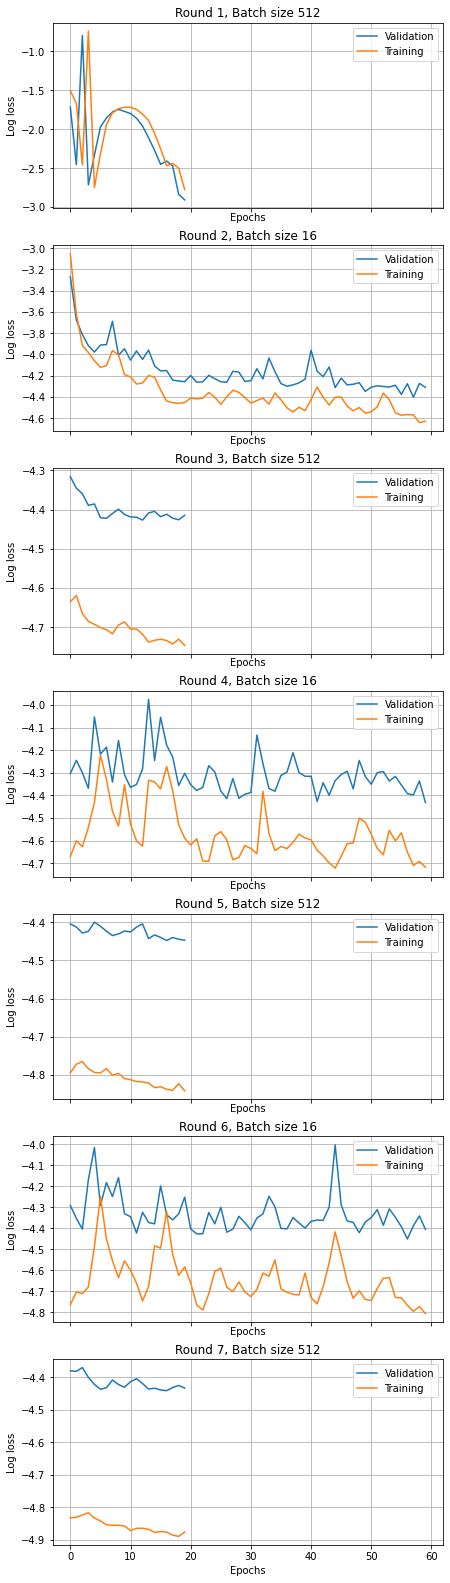

In [15]:
import matplotlib.pyplot as plt
import numpy as np

f, ax = plt.subplots(len(history), 1, figsize=(7, len(history)*4), sharex=True)

for i in range(len(history)):

  ax[i].set_title(titles[i])
  ax[i].plot(history[i].epoch, np.log(history[i].history['val_loss']), label='Validation')
  ax[i].plot(history[i].epoch, np.log(history[i].history['loss']), label='Training')
  ax[i].set_xlabel('Epochs')
  ax[i].set_ylabel('Log loss')
  ax[i].legend()
  ax[i].grid()

### Encoding

#### Encode the data

In [16]:
qt = pd.concat([x_train,x_test], axis=0)
qt.head()

,01-22-2020,01-23-2020,01-24-2020,01-25-2020,01-26-2020,01-27-2020,01-28-2020,01-29-2020,01-30-2020,01-31-2020,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,02-13-2020,02-14-2020,02-15-2020,02-16-2020,02-17-2020,02-18-2020,02-19-2020,02-20-2020,02-21-2020,02-22-2020,02-23-2020,02-24-2020,02-25-2020,02-26-2020,02-27-2020,02-28-2020,02-29-2020,03-01-2020,03-02-2020,03-03-2020,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,03-13-2020,03-14-2020,03-15-2020,03-16-2020,03-17-2020,03-18-2020,03-19-2020,03-20-2020,03-21-2020,03-22-2020,03-23-2020,03-24-2020,03-25-2020,03-26-2020
"Zhejiang, China",0.986667,0.99006,0.990069,0.990036,0.990109,0.990,0.990007,0.990142,0.990244,0.990266,0.990181,0.990093,0.990061,0.990053,0.990035,0.990024,0.990019,0.990013,0.990007,0.990003,0.990002,0.989918,0.989514,0.989384,0.988945,0.98865,0.988408,0.988172,0.988103,0.988069,0.988704,0.988692,0.988675,0.988675,0.988675,0.987560,0.986427,0.986416,0.986393,0.986393,0.98,0.980000,0.98,0.980000,0.980000,0.980,0.980,0.980000,0.968876,0.968858,0.968858,0.968717,0.964986,0.961047,0.958024,0.948839,0.948295,0.940000,0.940000,0.933759,0.927937,0.920000,0.912149,0.892400,0.875077
East Timor,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.175000,0.000000,0.000000,0.000000,0.000000,0.000000
Serbia,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.580000,0.555,0.510,0.500000,0.610000,0.680000,0.710000,0.726667,0.720000,0.700000,0.690000,0.665000,0.675000,0.671111,0.685714,0.691765,0.700000,0.690909,0.695357,0.716250,0.690270
"California, US",0.000000,0.00000,0.000000,0.000000,0.873333,0.864,0.860000,0.860000,0.853333,0.855000,0.860000,0.860000,0.866667,0.865000,0.865000,0.865000,0.860000,0.860000,0.861818,0.860000,0.860000,0.860000,0.860000,0.860000,0.860000,0.86000,0.860000,0.860000,0.860000,0.860000,0.868889,0.860000,0.860000,0.860000,0.850000,0.846667,0.846000,0.844615,0.833333,0.823333,0.84,0.836667,0.84,0.841538,0.841053,0.856,0.859,0.854348,0.871429,0.872000,0.880000,0.888409,0.897174,0.899767,0.909434,0.920000,0.919365,0.927324,0.937273,0.942786,0.944124,0.950447,0.953726,0.957045,0.960000
"Newfoundland and Labrador, Canada",0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,0.265000,0.340000,0.315000,0.300000,0.293333,0.300000,0.296000,0.360000,0.385000,0.350000,0.456000


In [17]:
encoded_data=pd.DataFrame(vae.encoder.predict(qt),index=qt.index, columns=['Type'])
encoded_data.head()

,Type
"Zhejiang, China",-1.679868
East Timor,1.073441
Serbia,0.100433
"California, US",-1.067477
"Newfoundland and Labrador, Canada",0.543916


#### Compute types

In [18]:
min_x, max_x, grid_n = -2, 2, 401
grid_x = np.linspace(min_x,max_x,grid_n)
decoded=vae.decoder.predict(grid_x)
decoded.shape

(401, 65)

#### Explore the distribution of types

In [0]:
import seaborn as sns

def plot_type_dist(encoded_data, grid_x, decoded, vertical_n, 
                   feature_labels, n_grid_lines=21):

  fig = plt.figure(figsize=(10,vertical_n*2.5),constrained_layout=True)
  gs = fig.add_gridspec(vertical_n, 1)
  ax1 = fig.add_subplot(gs[0,:])
  ax2 = fig.add_subplot(gs[1:,:])

  min_x, max_x, grid_n = grid_x[0], grid_x[-1], len(grid_x)
  grid_lines = np.linspace(min_x,max_x,n_grid_lines)

  ax1.set_title('Encoded data distribution')
  sns.kdeplot(encoded_data,bw=0.02, shade = True, ax=ax1, gridsize=2000)
  ax1.set_xticks( grid_lines )
  ax1.set_xlim(min_x,max_x)
  ax1.grid(axis='x')

  ax2.set_title('Generated types')

  sns.heatmap(decoded.T,cmap='viridis',ax=ax2, cbar_kws={'orientation':'horizontal'})
  ax2.set_xticks(np.linspace(1,grid_n,n_grid_lines))
  ax2.set_xticklabels(['{:.2}'.format(a) for a in grid_lines ])
  ax2.set_yticklabels(feature_labels)
  ax2.tick_params(axis='y',labelright=True, labelleft=False, 
                  left=False, labelrotation=0)
  ax2.grid(axis='x')

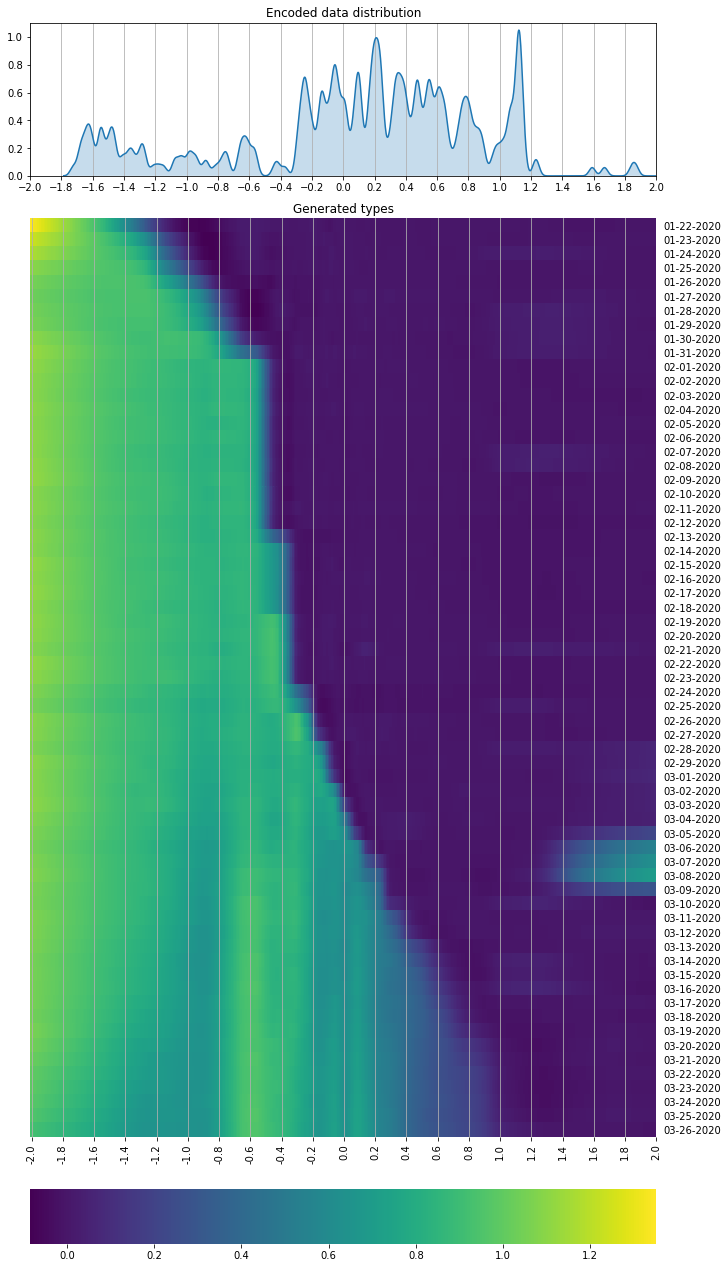

In [20]:
plot_type_dist(encoded_data.values.flatten(), grid_x, decoded, 
               vertical_n=7, feature_labels=qt.columns)

plt.savefig('plot_dist_type.png')

#### Explore encoding sorted data 

In [21]:
data = encoded_data.join(confirmed)

data = data.sort_values(by='Type')

data.to_csv('covid19_confirmed.csv')
data

,Type,01-22-2020,01-23-2020,01-24-2020,01-25-2020,01-26-2020,01-27-2020,01-28-2020,01-29-2020,01-30-2020,01-31-2020,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,02-13-2020,02-14-2020,02-15-2020,02-16-2020,02-17-2020,02-18-2020,02-19-2020,02-20-2020,02-21-2020,02-22-2020,02-23-2020,02-24-2020,02-25-2020,02-26-2020,02-27-2020,02-28-2020,02-29-2020,03-01-2020,03-02-2020,03-03-2020,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,03-13-2020,03-14-2020,03-15-2020,03-16-2020,03-17-2020,03-18-2020,03-19-2020,03-20-2020,03-21-2020,03-22-2020,03-23-2020,03-24-2020,03-25-2020,03-26-2020
"Hubei, China",-1.725141,444.0,444.0,549.0,761.0,1058.0,1423.0,3554.0,3554.0,4903.0,5806.0,7153.0,11177.0,13522.0,16678.0,19665.0,22112.0,24953.0,27100.0,29631.0,31728.0,33366.0,33366.0,48206.0,54406.0,56249.0,58182.0,59989.0,61682.0,62031.0,62442.0,62662.0,64084.0,64084.0,64287.0,64786.0,65187.0,65596.0,65914.0,66337.0,66907.0,67103.0,67217.0,67332.0,67466.0,67592.0,67666.0,67707.0,67743.0,67760.0,67773.0,67781.0,67786.0,67790.0,67794.0,67798.0,67799.0,67800.0,67800.0,67800.0,67800.0,67800.0,67800.0,67801.0,67801.0,67801.0
"Guangdong, China",-1.686036,26.0,32.0,53.0,78.0,111.0,151.0,207.0,277.0,354.0,436.0,535.0,632.0,725.0,813.0,895.0,970.0,1034.0,1095.0,1131.0,1159.0,1177.0,1219.0,1241.0,1261.0,1294.0,1316.0,1322.0,1328.0,1331.0,1332.0,1333.0,1339.0,1342.0,1345.0,1347.0,1347.0,1347.0,1348.0,1349.0,1349.0,1350.0,1350.0,1350.0,1351.0,1352.0,1352.0,1352.0,1352.0,1353.0,1356.0,1356.0,1356.0,1356.0,1360.0,1361.0,1364.0,1370.0,1378.0,1395.0,1400.0,1407.0,1415.0,1428.0,1433.0,1448.0
"Zhejiang, China",-1.679868,10.0,27.0,43.0,62.0,104.0,128.0,173.0,296.0,428.0,538.0,599.0,661.0,724.0,829.0,895.0,954.0,1006.0,1048.0,1075.0,1092.0,1117.0,1131.0,1145.0,1155.0,1162.0,1167.0,1171.0,1172.0,1174.0,1175.0,1203.0,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1206.0,1213.0,1213.0,1215.0,1215.0,1215.0,1215.0,1215.0,1215.0,1215.0,1215.0,1215.0,1227.0,1231.0,1231.0,1232.0,1232.0,1233.0,1234.0,1236.0,1237.0,1238.0,1240.0,1241.0,1243.0
"Henan, China",-1.665852,5.0,5.0,9.0,32.0,83.0,128.0,168.0,206.0,278.0,352.0,422.0,493.0,566.0,675.0,764.0,851.0,914.0,981.0,1033.0,1073.0,1105.0,1135.0,1169.0,1184.0,1212.0,1231.0,1246.0,1257.0,1262.0,1265.0,1267.0,1270.0,1271.0,1271.0,1271.0,1271.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1273.0,1274.0,1274.0,1274.0,1275.0
"Hunan, China",-1.660306,4.0,9.0,24.0,43.0,69.0,100.0,143.0,221.0,277.0,332.0,389.0,463.0,521.0,593.0,661.0,711.0,772.0,803.0,838.0,879.0,912.0,946.0,968.0,988.0,1001.0,1004.0,1006.0,1007.0,1008.0,1010.0,1011.0,1013.0,1016.0,1016.0,1016.0,1016.0,1017.0,1017.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Edmonton, Alberta, Canada",1.668942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Calgary, Alberta, Canada",1.844257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vatican City,1.870096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

Conclusion: Timing of first confirmed case dominates this encoding. Need to apply a different transformation to get a richer view. After some consideration selected adding 1 followed by a log followed by a devision my the training set max.

### Log transformation

#### Transform

In [0]:
from sklearn.model_selection import train_test_split 

x_train, x_test = train_test_split(confirmed, test_size=0.25, random_state=42)

confirmed = pd.concat([x_train,x_test], axis=0)

x = np.log(x_train.values + 1)
max_train_log = np.max(x) 
x /= max_train_log
x_train = pd.DataFrame(x,index=x_train.index, 
                       columns=x_train.columns)

x = np.log(x_test.values + 1)
x /= max_train_log
x_test = pd.DataFrame(x,index=x_test.index, 
                       columns=x_test.columns)

#### Recompute encoding

In [29]:
from tensorflow import set_random_seed
from numpy.random import seed

seed(42)
set_random_seed(42)

vae = make_vae(input_shape=(x_train.shape[1],))

vae.compile(optimizer='adam', loss=None)

n_batch_sizes=7

history = ['']*n_batch_sizes
titles  = ['']*n_batch_sizes

# Train the VAE on boston housing data

for i in range(n_batch_sizes):

  # Alternate between a few epochs with large batch size (realiable decrease in 
  # loss but weak and overfitting) and a few epochs with small batch size
  # (strong and non-overfitting but could increase loss)
  batch_size = 512*(1-(i%2)) + 16*(i%2)
  epochs = 20*(1-(i%2)) + 60*(i%2)

  print('Batch size:', batch_size)
  titles[i] = 'Round {}, Batch size {}'.format(i+1, batch_size)

  history[i] = vae.fit(x=x_train, y=None,
                       shuffle=True,
                       epochs=epochs,
                       batch_size=batch_size,
                       validation_data=(x_test, None))

Batch size: 512
Train on 251 samples, validate on 84 samples
Epoch 1/20
251/251 [==============================] - 1s 4ms/sample - loss: 0.0594 - val_loss: 0.0405
Epoch 2/20
251/251 [==============================] - 0s 734us/sample - loss: 0.0532 - val_loss: 0.0321
Epoch 3/20
251/251 [==============================] - 0s 725us/sample - loss: 0.0435 - val_loss: 0.0240
Epoch 4/20
251/251 [==============================] - 0s 725us/sample - loss: 0.0270 - val_loss: 0.0362
Epoch 5/20
251/251 [==============================] - 0s 745us/sample - loss: 0.0417 - val_loss: 0.0163
Epoch 6/20
251/251 [==============================] - 0s 741us/sample - loss: 0.0195 - val_loss: 0.0192
Epoch 7/20
251/251 [==============================] - 0s 727us/sample - loss: 0.0247 - val_loss: 0.0206
Epoch 8/20
251/251 [==============================] - 0s 722us/sample - loss: 0.0264 - val_loss: 0.0191
Epoch 9/20
251/251 [==============================] - 0s 749us/sample - loss: 0.0250 - val_loss: 0.0157
Epoch

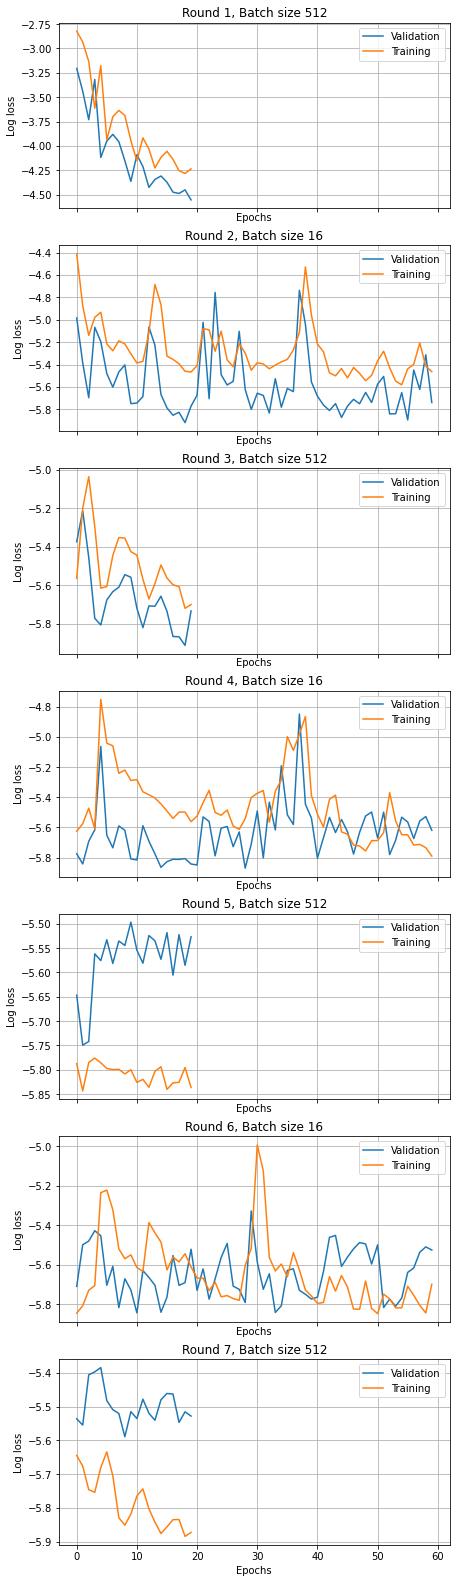

In [30]:
import matplotlib.pyplot as plt
import numpy as np

f, ax = plt.subplots(len(history), 1, figsize=(7, len(history)*4), sharex=True)

for i in range(len(history)):

  ax[i].set_title(titles[i])
  ax[i].plot(history[i].epoch, np.log(history[i].history['val_loss']), label='Validation')
  ax[i].plot(history[i].epoch, np.log(history[i].history['loss']), label='Training')
  ax[i].set_xlabel('Epochs')
  ax[i].set_ylabel('Log loss')
  ax[i].legend()
  ax[i].grid()

#### Explore encoding

In [0]:
qt = pd.concat([x_train,x_test], axis=0)
encoded_data=pd.DataFrame(vae.encoder.predict(qt),index=qt.index, columns=['Type'])
min_x, max_x, grid_n = -2, 2, 401
grid_x = np.linspace(min_x,max_x,grid_n)
decoded=vae.decoder.predict(grid_x)

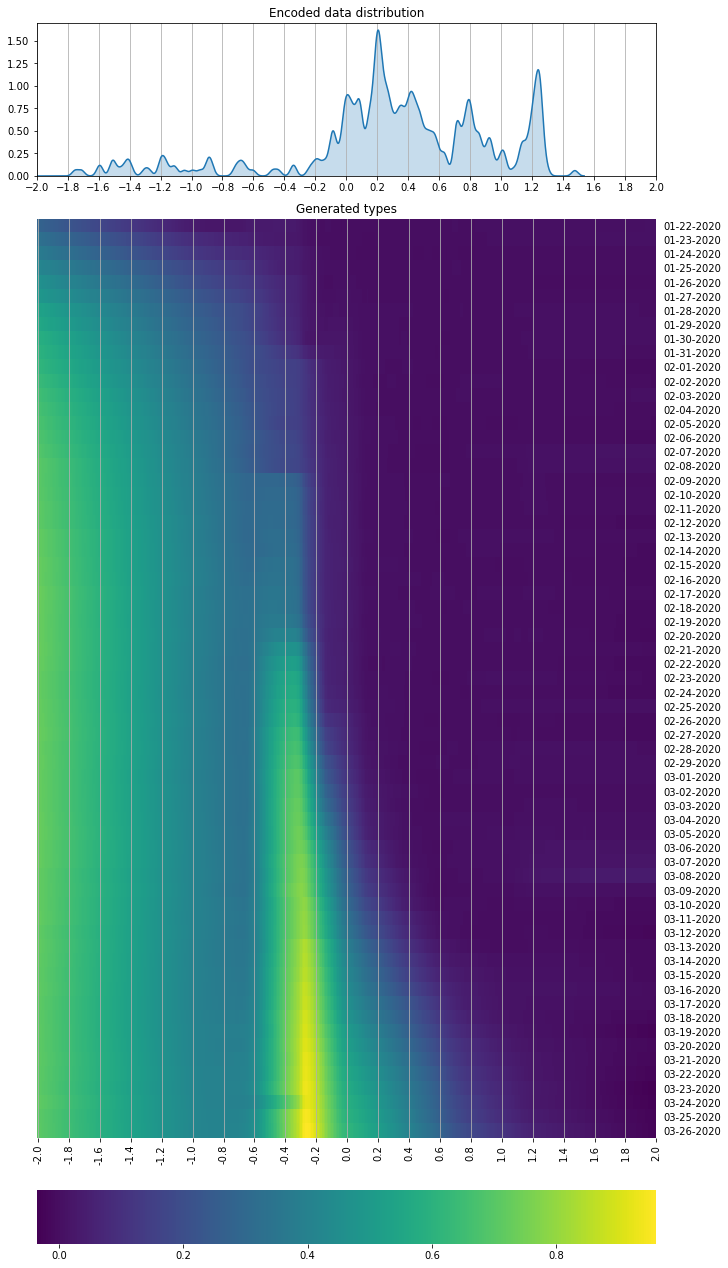

In [32]:
plot_type_dist(encoded_data.values.flatten(), grid_x, decoded, 
               vertical_n=7, feature_labels=qt.columns)

plt.savefig('plot_dist_type.png')

In [33]:
data = encoded_data.join(qt)

data = data.sort_values(by='Type')

data.to_csv('covid19_confirmed.csv')
data

,Type,01-22-2020,01-23-2020,01-24-2020,01-25-2020,01-26-2020,01-27-2020,01-28-2020,01-29-2020,01-30-2020,01-31-2020,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,02-13-2020,02-14-2020,02-15-2020,02-16-2020,02-17-2020,02-18-2020,02-19-2020,02-20-2020,02-21-2020,02-22-2020,02-23-2020,02-24-2020,02-25-2020,02-26-2020,02-27-2020,02-28-2020,02-29-2020,03-01-2020,03-02-2020,03-03-2020,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,03-13-2020,03-14-2020,03-15-2020,03-16-2020,03-17-2020,03-18-2020,03-19-2020,03-20-2020,03-21-2020,03-22-2020,03-23-2020,03-24-2020,03-25-2020,03-26-2020
"Hubei, China",-2.606873,0.539790,0.539790,0.558542,0.587401,0.616535,0.642750,0.723733,0.723733,0.752209,0.767170,0.785636,0.825139,0.841997,0.860564,0.875147,0.885528,0.896227,0.903533,0.911436,0.917488,0.921944,0.921944,0.954513,0.965223,0.968172,0.971162,0.973870,0.976333,0.976833,0.977417,0.977729,0.979715,0.979715,0.979995,0.980679,0.981225,0.981779,0.982207,0.982773,0.983531,0.983790,0.983940,0.984091,0.984267,0.984432,0.984529,0.984583,0.984630,0.984652,0.984669,0.984679,0.984686,0.984691,0.984696,0.984702,0.984703,0.984704,0.984704,0.984704,0.984704,0.984704,0.984704,0.984706,0.984706,0.984706
"Guangdong, China",-1.751103,0.291741,0.309504,0.353097,0.386775,0.417672,0.444704,0.472469,0.498146,0.519788,0.538184,0.556259,0.570983,0.583117,0.593245,0.601740,0.608856,0.614506,0.619575,0.622436,0.624599,0.625962,0.629063,0.630645,0.632059,0.634344,0.635835,0.636237,0.636638,0.636838,0.636904,0.636970,0.637368,0.637566,0.637763,0.637895,0.637895,0.637895,0.637960,0.638026,0.638026,0.638091,0.638091,0.638091,0.638157,0.638222,0.638222,0.638222,0.638222,0.638288,0.638484,0.638484,0.638484,0.638484,0.638744,0.638809,0.639004,0.639392,0.639907,0.640992,0.641308,0.641749,0.642251,0.643060,0.643369,0.644290
"Zhejiang, China",-1.709647,0.212257,0.294960,0.334969,0.366742,0.411960,0.430181,0.456670,0.503998,0.536548,0.556753,0.566244,0.574948,0.582995,0.594968,0.601740,0.607385,0.612079,0.615696,0.617945,0.619333,0.621335,0.622436,0.623524,0.624293,0.624828,0.625207,0.625510,0.625585,0.625736,0.625812,0.627894,0.628041,0.628041,0.628041,0.628041,0.628041,0.628041,0.628041,0.628041,0.628041,0.628115,0.628627,0.628627,0.628772,0.628772,0.628772,0.628772,0.628772,0.628772,0.628772,0.628772,0.628772,0.629642,0.629929,0.629929,0.630001,0.630001,0.630073,0.630145,0.630288,0.630359,0.630431,0.630574,0.630645,0.630787
"Henan, China",-1.594700,0.158603,0.158603,0.203820,0.309504,0.392207,0.430181,0.454089,0.472042,0.498464,0.519288,0.535302,0.549036,0.561236,0.576801,0.587749,0.597283,0.603598,0.609853,0.614421,0.617780,0.620379,0.622748,0.625359,0.626486,0.628554,0.629929,0.631001,0.631778,0.632129,0.632339,0.632479,0.632688,0.632758,0.632758,0.632758,0.632758,0.632827,0.632827,0.632827,0.632827,0.632827,0.632827,0.632827,0.632827,0.632827,0.632827,0.632827,0.632827,0.632827,0.632897,0.632897,0.632897,0.632897,0.632897,0.632897,0.632897,0.632897,0.632897,0.632897,0.632897,0.632897,0.632966,0.632966,0.632966,0.633036
"Hunan, China",-1.589533,0.142464,0.203820,0.284929,0.334969,0.376069,0.408522,0.439918,0.478235,0.498146,0.514125,0.528112,0.543491,0.553917,0.565354,0.574948,0.581394,0.588670,0.592150,0.595922,0.600146,0.603404,0.606641,0.608674,0.610482,0.611638,0.611903,0.612079,0.612166,0.612254,0.612429,0.612517,0.612692,0.612953,0.612953,0.612953,0.612953,0.613040,0.613040,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127,0.613127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [0]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [38]:
@interact
def filter_by_code(center=(-2.0,2.0,0.01), width=(0,0.2,0.01)):
    sub_df = data.loc[(data['Type'] >= center-width/2)
             & (data['Type'] <= center + width/2)].iloc[:,1:]
    if len(sub_df>0):
      sub_df = (sub_df*max_train_log).apply(np.exp)
      sub_df.T.plot(figsize=(8,6),logy=True)
      plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
      plt.grid()

interactive(children=(FloatSlider(value=0.0, description='center', max=2.0, min=-2.0, step=0.01), FloatSlider(…

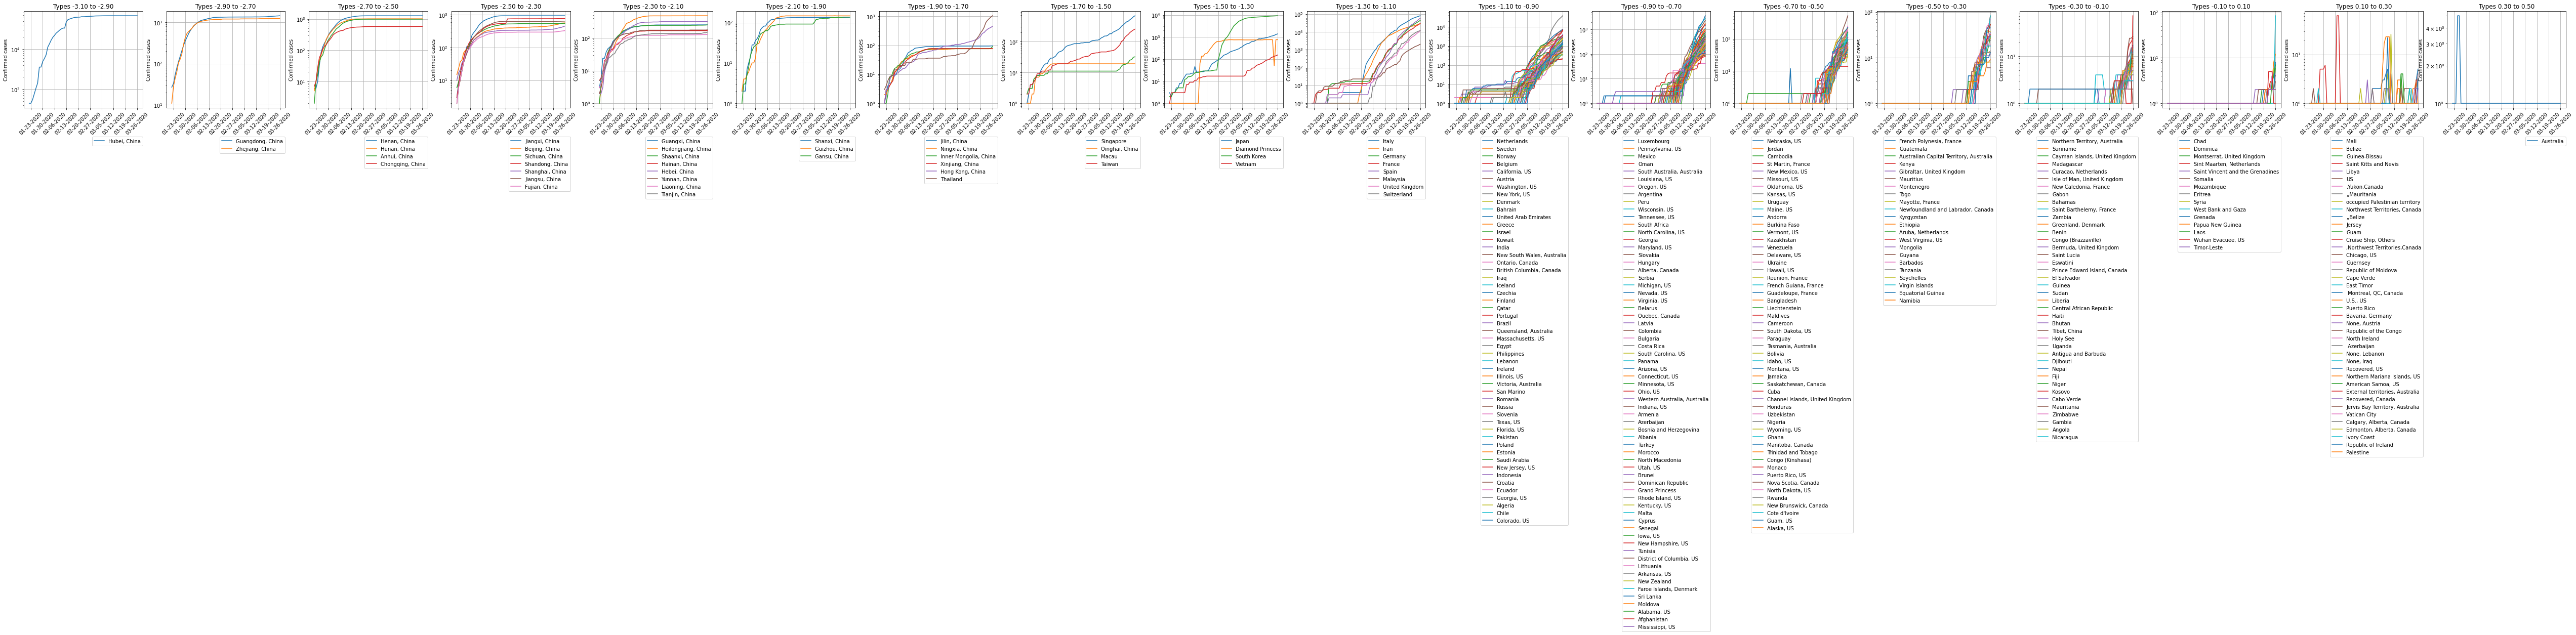

In [52]:
def plot_by_code(center=(-3.0,3.0,0.2), width=0.2):
    centers = np.arange(*center)
    sub_df=['']*len(centers)
    for i in range(len(centers)):
      sub_df[i] = data.loc[(data['Type'] >= centers[i]-width/2)
              & (data['Type'] <= centers[i] + width/2)].iloc[:,1:]
    sub_df = list(filter(lambda x: len(x)>0, sub_df))
    fig, ax = plt.subplots(1,len(sub_df), 
                           figsize = (5*len(sub_df),3.5))
    for i in range(len(sub_df)):
      sub_df[i] = (sub_df[i]*max_train_log).apply(np.exp)
      ax[i].plot(sub_df[i].T)
      ax[i].set_yscale('log')
      ax[i].set_ylabel('Confirmed cases')
      ax[i].legend(sub_df[i].index, bbox_to_anchor=(1, -0.3),
                   loc='upper right',borderaxespad=0.)
      ax[i].set_title('Types {:.2f} to {:.2f}'.format(centers[i] - width/2,
                                                      centers[i] + width/2))
      ax[i].grid(True)
      ax[i].set_xticks(range(1,sub_df[i].shape[1],7))
      ax[i].tick_params(axis='x',labelrotation=45)
        
plot_by_code()

In [195]:
number_list = range(-5, 5)
less_than_zero = list(filter(lambda x: x < 0, number_list))
print(less_than_zero)

[-5, -4, -3, -2, -1]


### Rate of spread

#### Explore x10 intervals

In [43]:
df4 = pd.DataFrame({'{}-{}'.format(j*100,j*1000): 
                   [np.sum(confirmed.iloc[i,1:] > 100*j) - np.sum(confirmed.iloc[i,1:] > 1000*j) 
                   for i in range(confirmed.shape[0])] for j in range(1,6)}, 
                   index=confirmed.index)

df5 = df4.loc[confirmed.iloc[:,-1]>5000]
df5

,100-1000,200-2000,300-3000,400-4000,500-5000
Austria,8,8,10,10,11
Switzerland,8,9,10,9,9
Germany,7,8,8,9,9
Italy,6,7,8,9,9
"New York, US",9,7,7,6,5
Belgium,10,11,11,11,13
South Korea,6,7,7,9,9
France,7,8,8,8,10
"Hubei, China",3,5,5,7,7
United Kingdom,9,11,11,10,8
